In [157]:
import numpy as np
import pandas as pd
file =  open(r'F:\0_个人学习\3_数据分析与挖掘\1_基础知识\2_数据分析与挖掘书本练习\0_第二章\ionosphere.data','r') 
data = pd.DataFrame(file.readlines())

In [158]:
data['pan'] = data[0].apply(lambda x : x.split(',')[-1].strip('\n'))
data[0] = data[0].apply(lambda x : x.split(',')[:-1])
x = np.array(list(data[0])).astype(np.float64)
y = np.array(list(data['pan']))

In [159]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.29, random_state=42)

In [160]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
estimator.fit(x_train,y_train)
y_predicted = estimator.predict(x_test)
y_predicted

array(['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'b',
       'g', 'g', 'g', 'g', 'g', 'g', 'b', 'g', 'b', 'b', 'g', 'g', 'g',
       'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'g', 'g', 'b',
       'g', 'g', 'g', 'g', 'b', 'g', 'b', 'b', 'g', 'g', 'g', 'g', 'g',
       'b', 'g', 'b', 'g', 'g', 'g', 'g', 'b', 'b', 'g', 'g', 'g', 'g',
       'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'b',
       'b', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'b', 'b', 'g',
       'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g'], dtype='<U1')

In [161]:
y_test
accuracy = np.mean(y_predicted == y_test)*100
print('The accuracy is {0:.1f}%'.format(accuracy))

The accuracy is 86.3%


In [162]:
scores = cross_val_score(estimator,x,y,scoring='accuracy')
av = np.mean(scores)
av

0.8261971830985916

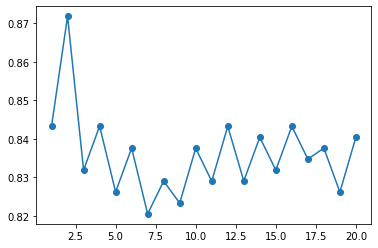

In [163]:
from matplotlib import pyplot as plt
avg_sc = []
all_sc = []
parameter_values = list(range(1,21))
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator,x,y,scoring='accuracy')
    avg_sc.append(np.mean(scores))
    all_sc.append(scores)
plt.plot(parameter_values,avg_sc,'-o')
plt.show()

In [165]:
from sklearn.preprocessing import MinMaxScaler
X_transformed = MinMaxScaler().fit_transform(x)
estimator = KNeighborsClassifier()
transformed_score = cross_val_score(estimator,X_transformed,y,scoring='accuracy')
print('The average accuracy is {0:.1f}%'.format(np.mean(transformed_score)*100))

The average accuracy is 82.9%
